### Predict Proba used the VGG Model

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from vgg16 import VGG_16
from resnet34 import ResNet34
from GoogLeNet import GoogLeNet
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
d:\Anaconda\envs\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_file = "Dataset\Dataset_Fashion(11-Label).csv"
test_file  = "Dataset\Testing(11 Label).csv"

train_data = pd.read_csv(train_file,index_col=0)
test_data = pd.read_csv(test_file,index_col=0)

In [3]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 11
TEST_SIZE = 0.1
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [4]:
# data preprocessing
from tensorflow.keras.utils import to_categorical
def data_preprocessing(raw):
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [5]:
X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [6]:
load_VGG16_from_weight=VGG_16()
load_VGG16_from_weight.load_weights(r'Model\Weight-model_VGG16-01.h5')
load_VGG16_from_weight.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
score_load_VGG16 = load_VGG16_from_weight.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_load_VGG16[0])
print('Test accuracy:', score_load_VGG16[1])

Test loss: 0.0614214725792408
Test accuracy: 0.9863636493682861


In [30]:
predict_proba=load_VGG16_from_weight.predict(X_test)
predicit_class_indices=predict_proba.argmax(axis=1)
predicit_class_indices    

7/7 [==============================] - 0s 16ms/step


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  9,  6,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  1,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

In [31]:
class_labels = y_test.argmax(axis=1)
class_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

- 0   =>  Ankle Boot
- 1   => Bag
- 2   =>  Coat
- 3   =>  Dress
- 4   =>  Hat
- 5   =>  Sandal
- 6   =>  Shirt
- 7   =>  Sneaker
- 8   =>  Trouser
- 9   =>  Tshirt_Top
- 10  => Pullover 

Label 0: Accuracy = 100.00%
Label 1: Accuracy = 100.00%
Label 2: Accuracy = 100.00%
Label 3: Accuracy = 100.00%
Label 4: Accuracy = 100.00%
Label 5: Accuracy = 100.00%
Label 6: Accuracy = 85.00%
Label 7: Accuracy = 100.00%
Label 8: Accuracy = 100.00%
Label 9: Accuracy = 100.00%
Label 10: Accuracy = 100.00%


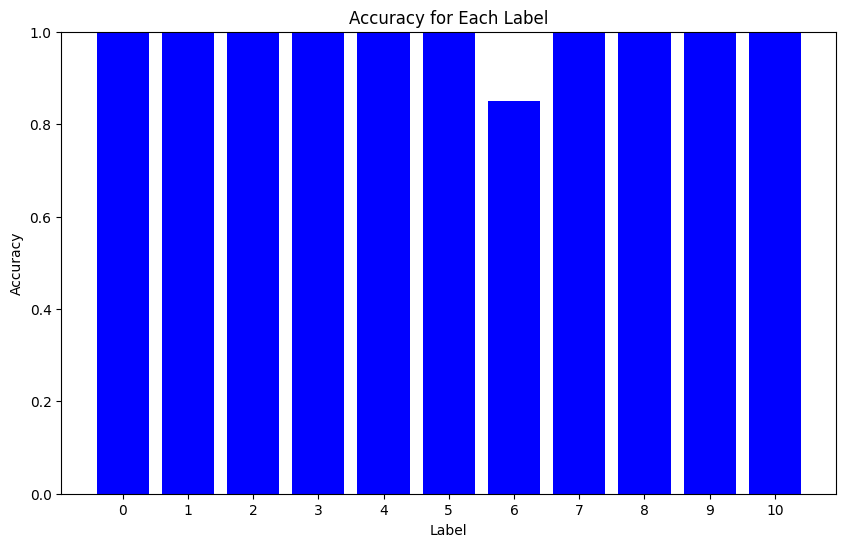

    Label  Accuracy
0       0      1.00
1       1      1.00
2       2      1.00
3       3      1.00
4       4      1.00
5       5      1.00
6       6      0.85
7       7      1.00
8       8      1.00
9       9      1.00
10     10      1.00


In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Calculate accuracy for each label
accuracy_per_label = []
unique_labels = np.unique(class_labels)

for label in unique_labels:
    indices = np.where(class_labels == label)[0]
    accuracy = accuracy_score(class_labels[indices], predicit_class_indices[indices])
    accuracy_per_label.append((label, accuracy))

# Print the accuracy for each label
for label, accuracy in accuracy_per_label:
    print(f'Label {label}: Accuracy = {accuracy * 100:.2f}%')


labels, accuracies = zip(*accuracy_per_label)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Label')
plt.xticks(labels)
plt.ylim(0, 1)  # Assuming accuracy is in the range [0, 1]
plt.show()

accuracy_per_label_frame = pd.DataFrame(accuracy_per_label, columns=['Label', 'Accuracy'])
print(accuracy_per_label_frame)

In [33]:
from sklearn.metrics import classification_report
y_pred_vgg = load_VGG16_from_weight.predict(X_test)
print(classification_report(y_test.argmax(axis=1), y_pred_vgg.argmax(axis=1)))

7/7 [==============================] - 0s 27ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.85      0.92        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       0.91      1.00      0.95        20
          10       1.00      1.00      1.00        20

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220



# Evaluation

### Confusion matriks


In [14]:
def confusion_matrix(actual, predicted, num_classes):
    """
    Calculate the confusion matrix for each class in multi-class classification.

    Parameters:
    - actual: Array of actual labels (ground truth)
    - predicted: Array of predicted labels (class predictions)
    - num_classes: Number of classes in the classification task

    Returns:
    - Dictionary containing confusion matrices for each class
    """
    if len(actual) != len(predicted):
        raise ValueError("Lengths of actual and predicted arrays must be the same.")

    metrics_per_class = {}

    for class_label in range(num_classes):
        class_indices = (actual == class_label)
        class_actual = actual[class_indices]
        class_predicted = predicted[class_indices]

        tp = np.sum((class_actual == class_label) & (class_predicted == class_label))
        tn = np.sum((class_actual != class_label) & (class_predicted != class_label))
        fp = np.sum((class_actual != class_label) & (class_predicted == class_label))
        fn = np.sum((class_actual == class_label) & (class_predicted != class_label))

        metrics_per_class[class_label] = {'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn}

    return metrics_per_class

In [29]:
def calculate_metrics(tp, tn, fp, fn):
    """
    Calculate precision, recall, and F1-score based on TP, TN, FP, and FN.

    Parameters:
    - tp: True Positive
    - tn: True Negative
    - fp: False Positive
    - fn: False Negative

    Returns:
    - Dictionary containing precision, recall, and F1-score
    """
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp+tn) / (tp + tn + fp + fn)
    return {
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score,
        'accuracy' : accuracy
    }

### Resnet

In [30]:
resnet34_load=ResNet34()
resnet34_load.load_weights('Model\Resnet_34-2.h5')

resnet34_load.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

y_pred_resnet = resnet34_load.predict(X_test)
y_pred_resnet = np.argmax(y_pred_resnet,axis=1)
y_test = np.argmax(y_test,axis=1)
cm_resnet = confusion_matrix(y_test, y_pred_resnet,11)
pd.DataFrame(cm_resnet)

7/7 [==============================] - 1s 111ms/step


,0,1,2,3,4,5,6,7,8,9,10
tp,19,20,17,19,18,20,17,19,19,19,19
tn,0,0,0,0,0,0,0,0,0,0,0
fp,0,0,0,0,0,0,0,0,0,0,0
fn,1,0,3,1,2,0,3,1,1,1,1


In [31]:
# Calculate the classification report
data_resnet=[]
class_metrics = {}
for class_label, metrics in cm_resnet.items():
        tp = metrics['tp']
        tn = metrics['tn']
        fp = metrics['fp']
        fn = metrics['fn']
        class_metrics[str(class_label)] = calculate_metrics(tp, tn, fp, fn)
for class_label, metrics in class_metrics.items():
    class_data = {
        'Label': int(class_label),
        'Accuracy':metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-score': metrics['f1-score']
    }
    data_resnet.append(class_data)
data_resnet=pd.DataFrame(data_resnet)
data_resnet

,Label,Accuracy,Precision,Recall,F1-score
0,0,0.95,1.0,0.95,0.974359
1,1,1.00,1.0,1.00,1.000000
2,2,0.85,1.0,0.85,0.918919
3,3,0.95,1.0,0.95,0.974359
4,4,0.90,1.0,0.90,0.947368
5,5,1.00,1.0,1.00,1.000000
6,6,0.85,1.0,0.85,0.918919
7,7,0.95,1.0,0.95,0.974359
8,8,0.95,1.0,0.95,0.974359
9,9,0.95,1.0,0.95,0.974359


In [32]:
print("Accuracy", data_resnet['Accuracy'].mean())
print("Precision", data_resnet['Precision'].mean())
print("Recall", data_resnet['Recall'].mean())
print("F1-score", data_resnet['F1-score'].mean())

Accuracy 0.9363636363636361
Precision 1.0
Recall 0.9363636363636361
F1-score 0.966487282276756


In [55]:
# report = classification_report(y_test, y_pred_resnet, 11)
# report = pd.DataFrame(report,index=[0,1,2,3,4,5,6,7,8,9,10])
# report

,overall_accuracy,macro_precision,macro_recall,macro_f1_score,micro_precision,micro_recall,micro_f1_score
0,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
1,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
2,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
3,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
4,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
5,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
6,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
7,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
8,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364
9,0.936364,0.940861,0.936364,0.936509,0.936364,0.936364,0.936364


### GoogleNet

In [33]:
load_GoogleNet_from_weight=GoogLeNet()
load_GoogleNet_from_weight.load_weights(r'Model\Weight-model_GoogleNet-01.h5')
load_GoogleNet_from_weight.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

y_pred_googlenet = load_GoogleNet_from_weight.predict(X_test)
y_pred_googlenet = np.argmax(y_pred_googlenet,axis=1)
y_test = np.argmax(y_test,axis=1)
cm_googlenet = confusion_matrix(y_test, y_pred_googlenet,11)
pd.DataFrame(cm_googlenet)

7/7 [==============================] - 0s 17ms/step


,0,1,2,3,4,5,6,7,8,9,10
tp,18,13,20,19,20,20,18,18,19,9,12
tn,0,0,0,0,0,0,0,0,0,0,0
fp,0,0,0,0,0,0,0,0,0,0,0
fn,2,7,0,1,0,0,2,2,1,11,8


In [34]:
# Calculate the classification report
data_googlenet=[]
class_metrics = {}
for class_label, metrics in cm_googlenet.items():
        tp = metrics['tp']
        tn = metrics['tn']
        fp = metrics['fp']
        fn = metrics['fn']
        class_metrics[str(class_label)] = calculate_metrics(tp, tn, fp, fn)
for class_label, metrics in class_metrics.items():
    class_data = {
        'Label': int(class_label),
        'Accuracy':metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-score': metrics['f1-score']
    }
    data_googlenet.append(class_data)
data_googlenet=pd.DataFrame(data_googlenet)
data_googlenet

,Label,Accuracy,Precision,Recall,F1-score
0,0,0.90,1.0,0.90,0.947368
1,1,0.65,1.0,0.65,0.787879
2,2,1.00,1.0,1.00,1.000000
3,3,0.95,1.0,0.95,0.974359
4,4,1.00,1.0,1.00,1.000000
5,5,1.00,1.0,1.00,1.000000
6,6,0.90,1.0,0.90,0.947368
7,7,0.90,1.0,0.90,0.947368
8,8,0.95,1.0,0.95,0.974359
9,9,0.45,1.0,0.45,0.620690


In [35]:
print("Accuracy", data_googlenet['Accuracy'].mean())
print("Precision", data_googlenet['Precision'].mean())
print("Recall", data_googlenet['Recall'].mean())
print("F1-score", data_googlenet['F1-score'].mean())

Accuracy 0.8454545454545453
Precision 1.0
Recall 0.8454545454545453
F1-score 0.9044901504479133


### VGG

In [36]:
load_VGG16_from_weight=VGG_16()
load_VGG16_from_weight.load_weights(r'Model\Weight-model_VGG16-01.h5')
load_VGG16_from_weight.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

y_pred_vgg = load_VGG16_from_weight.predict(X_test)
y_pred_vgg = np.argmax(y_pred_vgg,axis=1)
y_test = np.argmax(y_test,axis=1)
cm_vgg = confusion_matrix(y_test, y_pred_vgg,11)
pd.DataFrame(cm_vgg)

7/7 [==============================] - 1s 46ms/step


,0,1,2,3,4,5,6,7,8,9,10
tp,20,20,20,20,20,20,17,20,20,20,20
tn,0,0,0,0,0,0,0,0,0,0,0
fp,0,0,0,0,0,0,0,0,0,0,0
fn,0,0,0,0,0,0,3,0,0,0,0


In [37]:
# Calculate the classification report
data_vgg=[]
class_metrics = {}
for class_label, metrics in cm_vgg.items():
        tp = metrics['tp']
        tn = metrics['tn']
        fp = metrics['fp']
        fn = metrics['fn']
        class_metrics[str(class_label)] = calculate_metrics(tp, tn, fp, fn)
for class_label, metrics in class_metrics.items():
    class_data = {
        'Label': int(class_label),
        'Accuracy':metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-score': metrics['f1-score']
    }
    data_vgg.append(class_data)
data_vgg=pd.DataFrame(data_vgg)
data_vgg

,Label,Accuracy,Precision,Recall,F1-score
0,0,1.00,1.0,1.00,1.000000
1,1,1.00,1.0,1.00,1.000000
2,2,1.00,1.0,1.00,1.000000
3,3,1.00,1.0,1.00,1.000000
4,4,1.00,1.0,1.00,1.000000
5,5,1.00,1.0,1.00,1.000000
6,6,0.85,1.0,0.85,0.918919
7,7,1.00,1.0,1.00,1.000000
8,8,1.00,1.0,1.00,1.000000
9,9,1.00,1.0,1.00,1.000000


In [39]:
print("Accuracy", data_vgg['Accuracy'].mean())
print("Precision", data_vgg['Precision'].mean())
print("Recall", data_vgg['Recall'].mean())
print("F1-score", data_vgg['F1-score'].mean())

Accuracy 0.9863636363636363
Precision 1.0
Recall 0.9863636363636363
F1-score 0.9926289926289926


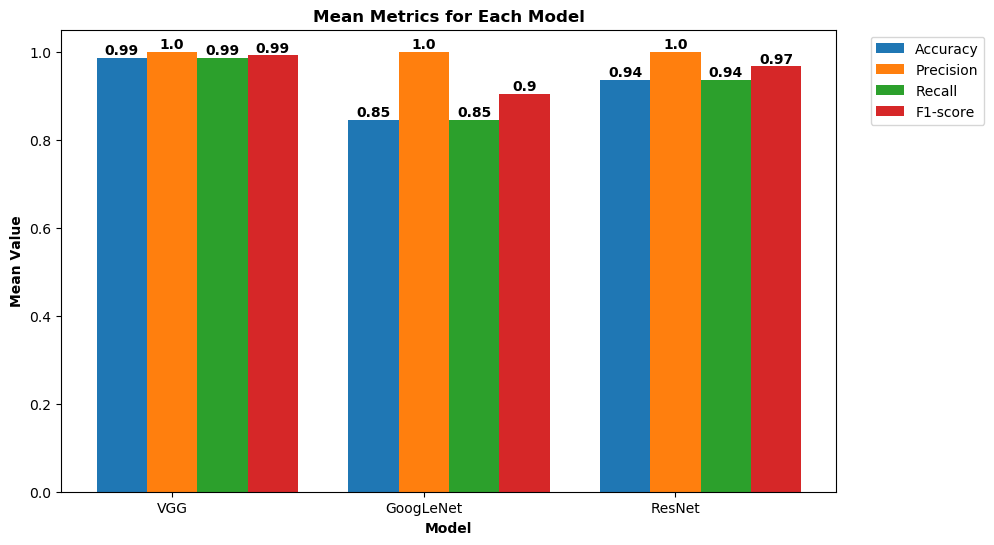

In [48]:
mean_accuracy_vgg = data_vgg['Accuracy'].mean()
mean_precision_vgg = data_vgg['Precision'].mean()
mean_recall_vgg = data_vgg['Recall'].mean()
mean_f1_score_vgg = data_vgg['F1-score'].mean()

mean_accuracy_googlenet = data_googlenet['Accuracy'].mean()
mean_precision_googlenet = data_googlenet['Precision'].mean()
mean_recall_googlenet = data_googlenet['Recall'].mean()
mean_f1_score_googlenet = data_googlenet['F1-score'].mean()

mean_accuracy_resnet = data_resnet['Accuracy'].mean()
mean_precision_resnet = data_resnet['Precision'].mean()
mean_recall_resnet = data_resnet['Recall'].mean()
mean_f1_score_resnet = data_resnet['F1-score'].mean()

mean_data = pd.DataFrame({
    'Model': ['VGG', 'GoogLeNet', 'ResNet'],
    'Accuracy': [mean_accuracy_vgg, mean_accuracy_googlenet, mean_accuracy_resnet],
    'Precision': [mean_precision_vgg, mean_precision_googlenet, mean_precision_resnet],
    'Recall': [mean_recall_vgg, mean_recall_googlenet, mean_recall_resnet],
    'F1-score': [mean_f1_score_vgg, mean_f1_score_googlenet, mean_f1_score_resnet]
})

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.2

# Position of bars on x-axis
r1 = range(len(mean_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
bars1 = ax.bar(r1, mean_data['Accuracy'], width=bar_width, label='Accuracy')
bars2 = ax.bar(r2, mean_data['Precision'], width=bar_width, label='Precision')
bars3 = ax.bar(r3, mean_data['Recall'], width=bar_width, label='Recall')
bars4 = ax.bar(r4, mean_data['F1-score'], width=bar_width, label='F1-score')

# Adding labels
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Mean Value', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(mean_data))])
ax.set_xticklabels(mean_data['Model'])

# Adding legend with upper right position
ax.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))

# Adding title
ax.set_title('Mean Metrics for Each Model', fontweight='bold')

# Adding text labels on top of the bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.show()

In [ ]:
# def classification_report(y_true, y_pred, num_classes):
#     """
#     Create a classification report from scratch.

#     Parameters:
#     - y_true: Array of true labels
#     - y_pred: Array of predicted labels
#     - num_classes: Number of classes in the classification task

#     Returns:
#     - Dictionary containing precision, recall, and F1-score for each class, as well as overall accuracy and macro/micro-average metrics
#     """
#     if len(y_true) != len(y_pred):
#         raise ValueError("Lengths of true and predicted arrays must be the same.")

#     confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

#     for true_label, pred_label in zip(y_true, y_pred):
#         confusion_matrix[true_label, pred_label] += 1

#     class_metrics = {}

#     for i in range(num_classes):
#         tp = confusion_matrix[i, i]
#         fp = np.sum(confusion_matrix[:, i]) - tp
#         fn = np.sum(confusion_matrix[i, :]) - tp

#         precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#         recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#         f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#         class_metrics[str(i)] = {
#             'precision': precision,
#             'recall': recall,
#             'f1-score': f1_score
#         }

#     overall_accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
#     macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
#     macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
#     macro_f1_score = np.mean([metrics['f1-score'] for metrics in class_metrics.values()])

#     micro_precision = np.sum([confusion_matrix[i, i] for i in range(num_classes)]) / np.sum(confusion_matrix)
#     micro_recall = np.sum([confusion_matrix[i, i] for i in range(num_classes)]) / np.sum(confusion_matrix)
#     micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) != 0 else 0

#     report = {
#         # 'class_metrics': class_metrics,
#         'overall_accuracy': overall_accuracy,
#         'macro_precision': macro_precision,
#         'macro_recall': macro_recall,
#         'macro_f1_score': macro_f1_score,
#         'micro_precision': micro_precision,
#         'micro_recall': micro_recall,
#         'micro_f1_score': micro_f1_score
#     }

#     return report


In [ ]:
# def calculate_metrics(tp, tn, fp, fn):
#     """
#     Calculate precision, recall, and F1-score based on TP, TN, FP, and FN.

#     Parameters:
#     - tp: True Positive
#     - tn: True Negative
#     - fp: False Positive
#     - fn: False Negative

#     Returns:
#     - Dictionary containing precision, recall, and F1-score
#     """
#     precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#     return {
#         'precision': precision,
#         'recall': recall,
#         'f1-score': f1_score
#     }

# def classification_report_from_values(values):
#     """
#     Create a classification report from provided TP, TN, FP, FN values.

#     Parameters:
#     - values: Dictionary containing TP, TN, FP, FN for each class

#     Returns:
#     - Dictionary containing precision, recall, and F1-score for each class, as well as overall accuracy and macro/micro-average metrics
#     """
#     num_classes = len(values)
#     class_metrics = {}

#     overall_tp = overall_tn = overall_fp = overall_fn = 0

#     for class_label, metrics in values.items():
#         tp = metrics['tp']
#         tn = metrics['tn']
#         fp = metrics['fp']
#         fn = metrics['fn']

#         class_metrics[str(class_label)] = calculate_metrics(tp, tn, fp, fn)

#         overall_tp += tp
#         overall_tn += tn
#         overall_fp += fp
#         overall_fn += fn

#     overall_accuracy = (overall_tp + overall_tn) / (overall_tp + overall_tn + overall_fp + overall_fn)
#     macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
#     macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
#     macro_f1_score = np.mean([metrics['f1-score'] for metrics in class_metrics.values()])

#     micro_precision = overall_tp / (overall_tp + overall_fp) if (overall_tp + overall_fp) != 0 else 0
#     micro_recall = overall_tp / (overall_tp + overall_fn) if (overall_tp + overall_fn) != 0 else 0
#     micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) != 0 else 0

#     report = {
#         'class_metrics': class_metrics,
#         'overall_accuracy': overall_accuracy,
#         'macro_precision': macro_precision,
#         'macro_recall': macro_recall,
#         'macro_f1_score': macro_f1_score,
#         'micro_precision': micro_precision,
#         'micro_recall': micro_recall,
#         'micro_f1_score': micro_f1_score
#     }

#     return report